In [2]:
import numpy as np
import pandas as pd
import re
from textblob import TextBlob
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
file_path = 'twitter-elon-tesla-data.xlsx'
df = pd.read_excel(file_path)

In [4]:
print(df['post'][9])

@bevedoni Look at all the people watching behind the glass! 💥
Pretty exciting! 🥳🚀  go Tesla!


In [5]:
print(df.columns)
earliest_date = df['UTC Date'].min()
latest_date = df['UTC Date'].max()

print(f"Earliest date: {earliest_date}")
print(f"Latest date: {latest_date}")

Index(['User', 'Username', 'UTC Date', 'post', 'Binders', 'Permalink',
       'reposts', 'Likes count', 'Impressions', 'Quotes', 'Replies',
       'Bookmarks', 'post value'],
      dtype='object')
Earliest date: 2023-04-01 23:25:17
Latest date: 2023-07-03 22:58:58


In [41]:
print(df.dtypes)

User                              object
Username                          object
UTC Date                  datetime64[ns]
post                              object
Binders                          float64
Permalink                         object
reposts                            int64
Likes count                        int64
Impressions                        int64
Quotes                             int64
Replies                            int64
Bookmarks                          int64
post value                       float64
sentiment_score                  float64
Impressions_normalized           float64
likes_normalized                 float64
Cleaned_Tweets                    object
Subjectivity                     float64
Polarity                         float64
Sentiment                         object
day                                int32
dtype: object


In [6]:
def cleantwt (twt):
  emoj = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642" 
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
                      "]+", re.UNICODE)

  twt = re.sub('RT', '', twt) # remove 'RT' from tweets
  twt = re.sub('#[A-Za-z0-9]+', '', twt) # remove the '#' from the tweets
  twt = re.sub('\\n', '', twt) # remove the '\n' character
  twt = re.sub('https?:\/\/\S+', '', twt) # remove the hyperlinks
  twt = re.sub('@[\S]*', '', twt) # remove @mentions
  twt = re.sub('^[\s]+|[\s]+$', '', twt) # remove leading and trailing whitespaces
  twt = re.sub(emoj, '', twt) # remove emojis
  return twt

In [7]:
df['Cleaned_Tweets'] = df['post'].apply(cleantwt)
df.head()

,User,Username,UTC Date,post,Binders,Permalink,reposts,Likes count,Impressions,Quotes,Replies,Bookmarks,post value,Cleaned_Tweets
0,aHoy,@BrandonLeong3,2023-04-01 23:59:53,@Chrysto @elonmusk @Tesla Your burning passion...,NaN,https://www.twitter.com/user/status/1642315880...,0,0,1257,0,0,0,0.07,Your burning passion for tesla ….paid off in a...
1,victoria,@starveiRL,2023-04-01 23:59:46,i deleted that tweet cs i think an elon musk f...,NaN,https://www.twitter.com/user/status/1642315850...,0,0,22,0,0,0,0.00,i deleted that tweet cs i think an elon musk f...
2,Frances Caso,@frances_caso,2023-04-01 23:59:44,@elonmusk @ashleevance ELON; ❤️❤️❤️ THANK ~YOU...,NaN,https://www.twitter.com/user/status/1642315843...,0,1,8,0,0,0,0.00,ELON; THANK ~YOU FOR HAVING “Carlos Rodriguez...
3,DavidRowe ⧖ - #WATON,@DavidRoweWTL,2023-04-01 23:59:43,@GerberKawasaki @garyblack00 @farzyness @Tesla...,NaN,https://www.twitter.com/user/status/1642315838...,0,3,434,0,1,0,3.39,You aren't arguing that Tesla can't extend its...
4,The Green Living Guy,@greenlivingguy,2023-04-01 23:59:37,"CNBC Reports Tesla Installs Over 3,000 Solar R...",NaN,https://www.twitter.com/user/status/1642315816...,1,2,18,0,0,0,14.19,"CNBC Reports Tesla Installs Over 3,000 Solar R..."


In [8]:
df.drop(df[df['Cleaned_Tweets'] == ''].index, inplace = True)
df.duplicated().sum()

0

In [9]:
def getSubjectivity(twt):
  return TextBlob(twt).sentiment.subjectivity

def getPolarity(twt):
  return TextBlob(twt).sentiment.polarity

In [10]:
#Create two new columns to save the results of the created functions 
df['Subjectivity'] = df['Cleaned_Tweets'].apply(getSubjectivity)
df['Polarity'] = df['Cleaned_Tweets'].apply(getPolarity)

In [28]:
# Creating a function to classify or label the sentiments as negative, positive and neutral
def getSentiment(value):
  if value < 0:
    return 'Negative'
  elif value > 0:
    return 'Positive'
  else:
    return 'Neutral'

In [31]:
# Create a new column 'Sentiment'
df['Sentiment'] = df['Polarity'].apply(getSentiment)
#Show the data
df.head(20)

,User,Username,UTC Date,post,Binders,Permalink,reposts,Likes count,Impressions,Quotes,Replies,Bookmarks,post value,sentiment_score,Impressions_normalized,likes_normalized,Cleaned_Tweets,Subjectivity,Polarity,Sentiment
0,aHoy,@BrandonLeong3,2023-04-01 23:59:53,@Chrysto @elonmusk @Tesla Your burning passion...,NaN,https://www.twitter.com/user/status/1642315880...,0,0,1257,0,0,0,0.07,0.000000,1.096397e-04,0.000000,Your burning passion for tesla ….paid off in a...,0.000000,0.000000,Neutral
1,victoria,@starveiRL,2023-04-01 23:59:46,i deleted that tweet cs i think an elon musk f...,NaN,https://www.twitter.com/user/status/1642315850...,0,0,22,0,0,0,0.00,0.000000,1.918912e-06,0.000000,i deleted that tweet cs i think an elon musk f...,0.000000,0.000000,Neutral
2,Frances Caso,@frances_caso,2023-04-01 23:59:44,@elonmusk @ashleevance ELON; ❤️❤️❤️ THANK ~YOU...,NaN,https://www.twitter.com/user/status/1642315843...,0,1,8,0,0,0,0.00,0.000000,6.977862e-07,0.000014,ELON; THANK ~YOU FOR HAVING “Carlos Rodriguez...,0.000000,0.000000,Neutral
3,DavidRowe ⧖ - #WATON,@DavidRoweWTL,2023-04-01 23:59:43,@GerberKawasaki @garyblack00 @farzyness @Tesla...,NaN,https://www.twitter.com/user/status/1642315838...,0,3,434,0,1,0,3.39,0.250020,3.785490e-05,0.000042,You aren't arguing that Tesla can't extend its...,0.500000,0.250000,Positive
4,The Green Living Guy,@greenlivingguy,2023-04-01 23:59:37,"CNBC Reports Tesla Installs Over 3,000 Solar R...",NaN,https://www.twitter.com/user/status/1642315816...,1,2,18,0,0,0,14.19,0.000000,1.570019e-06,0.000028,"CNBC Reports Tesla Installs Over 3,000 Solar R...",0.000000,0.000000,Neutral
5,Solar Power For Your Home,@solarpwr4yrhome,2023-04-01 23:59:36,"CNBC Reports Tesla Installs Over 3,000 Solar R...",NaN,https://www.twitter.com/user/status/1642315808...,0,0,5,0,0,0,0.44,0.000000,4.361164e-07,0.000000,"CNBC Reports Tesla Installs Over 3,000 Solar R...",0.000000,0.000000,Neutral
6,Renewable Energies For Your Home,@EnergiesFor,2023-04-01 23:59:34,"CNBC Reports Tesla Installs Over 3,000 Solar R...",NaN,https://www.twitter.com/user/status/1642315800...,0,0,3,0,0,0,0.39,0.000000,2.616698e-07,0.000000,"CNBC Reports Tesla Installs Over 3,000 Solar R...",0.000000,0.000000,Neutral
7,Green Guru Guides,@GreenGuruGuides,2023-04-01 23:59:32,"CNBC Reports Tesla Installs Over 3,000 Solar R...",NaN,https://www.twitter.com/user/status/1642315793...,0,0,11,0,0,0,4.60,0.000000,9.594561e-07,0.000000,"CNBC Reports Tesla Installs Over 3,000 Solar R...",0.000000,0.000000,Neutral
8,Seth Leitman,@seth_leitman,2023-04-01 23:59:30,"CNBC Reports Tesla Installs Over 3,000 Solar R...",NaN,https://www.twitter.com/user/status/1642315783...,3,4,437,0,0,0,264.14,0.000000,3.811657e-05,0.000055,"CNBC Reports Tesla Installs Over 3,000 Solar R...",0.000000,0.000000,Neutral
9,☮️ Aspie's Maven  ☮️,@DoctorRobin,2023-04-01 23:59:26,@bevedoni Look at all the people watching behi...,NaN,https://www.twitter.com/user/status/1642315769...,0,0,40,0,0,0,11.38,0.072917,3.488931e-06,0.000000,Look at all the people watching behind the gla...,0.833333,0.072917,Positive


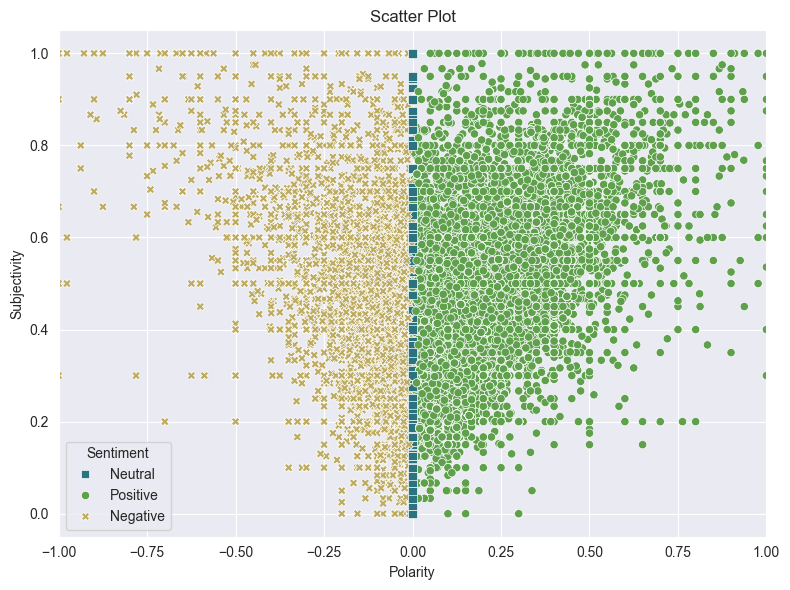

In [33]:
# Create scatter plot
sns.set_style('darkgrid')
plt.figure(figsize = (8,6))

markers = {'Positive':'o', 'Neutral':'s','Negative':'X'}

sns.scatterplot(data=df, x='Polarity', y='Subjectivity', hue = 'Sentiment', style = 'Sentiment', markers = markers, palette = 'gist_earth').set(xlim=(-1,1))
plt.title('Scatter Plot')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')

plt.tight_layout()

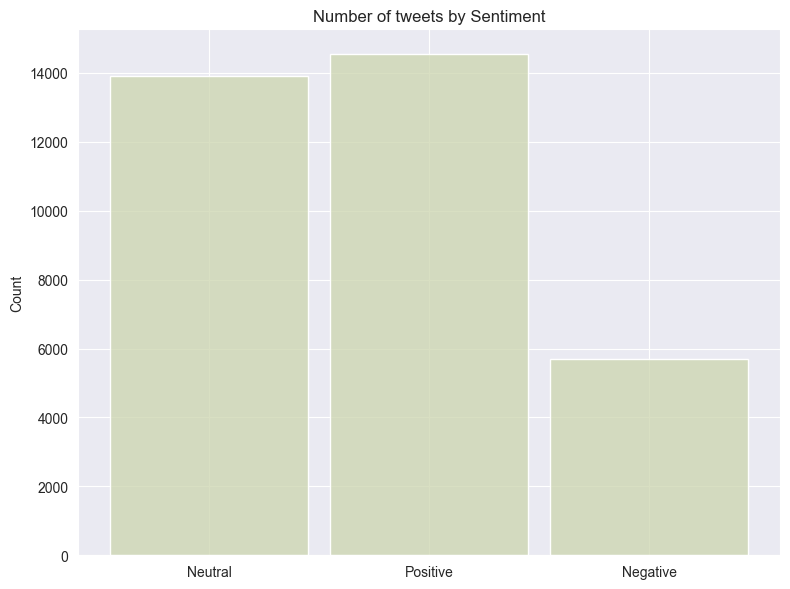

In [34]:
plt.figure(figsize = (8,6))

sns.histplot(df, x = 'Sentiment', color = '#ccd5ae', shrink = 0.9).set(xlabel = None)
plt.title('Number of tweets by Sentiment')

plt.tight_layout()

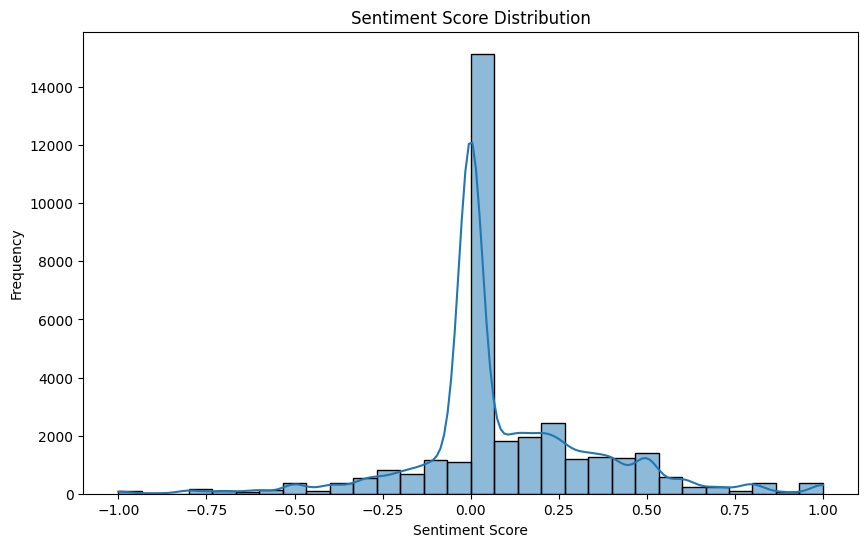

In [32]:
# Data Visualization
# Plot sentiment score distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['Polarity'], bins=30, kde=True)
plt.title('Sentiment Score Distribution')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.show()

# Plot average sentiment score by day (assuming there's a 'date' column)
if 'date' in df.columns:
    df['date'] = pd.to_datetime(df['date'])
    df['day'] = df['date'].dt.date
    daily_sentiment = df.groupby('day')['Polarity'].mean().reset_index()

    plt.figure(figsize=(14, 7))
    sns.lineplot(data=daily_sentiment, x='day', y='Polarity')
    plt.title('Average Sentiment Score by Day')
    plt.xlabel('Day')
    plt.ylabel('Average Sentiment Score')
    plt.xticks(rotation=45)
    plt.show()

In [7]:
# Get summary statistics for the 'Impressions' column
impressions_stats = df['Impressions'].describe()

df['Impressions_normalized'] = (df['Impressions'] - df['Impressions'].min()) / (df['Impressions'].max() - df['Impressions'].min())
df['likes_normalized'] = (df['Likes count'] - df['Likes count'].min()) / (df['Likes count'].max() - df['Likes count'].min())

In [8]:
# Calculate sentiment score
def calculate_sentiment(text, impressions, likes):
    analysis = TextBlob(text)
    sentiment_score = analysis.sentiment.polarity*(1 + impressions)*(1 + likes)
    return sentiment_score

df['sentiment_score'] = df.apply(lambda row: calculate_sentiment(row['post'], row['Impressions_normalized'], row['likes_normalized']), axis=1)

In [46]:
negative_values = (df['Polarity'] < 0).sum()
positive_values = (df['Polarity'] > 0).sum()

print(negative_values)
print(positive_values)

5688
14533


In [12]:
# Check for negative values in the 'sentiment_score' column
negative_values = df[df['sentiment_score'] < 0]

# Display the rows with negative sentiment scores
print(negative_values['post'].iloc[3])

does Elon Musk have anything better to do than making 25 superfluous changes to Twitter everyday?.. is he bored of playing with rockets during an economic collapse already? f*cking loser


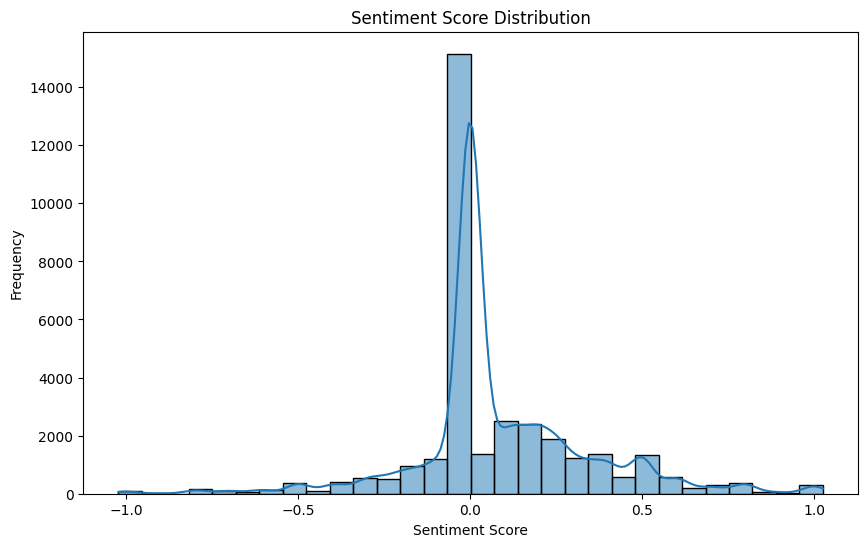

In [11]:
# Data Visualization
# Plot sentiment score distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['sentiment_score'], bins=30, kde=True)
plt.title('Sentiment Score Distribution')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.show()

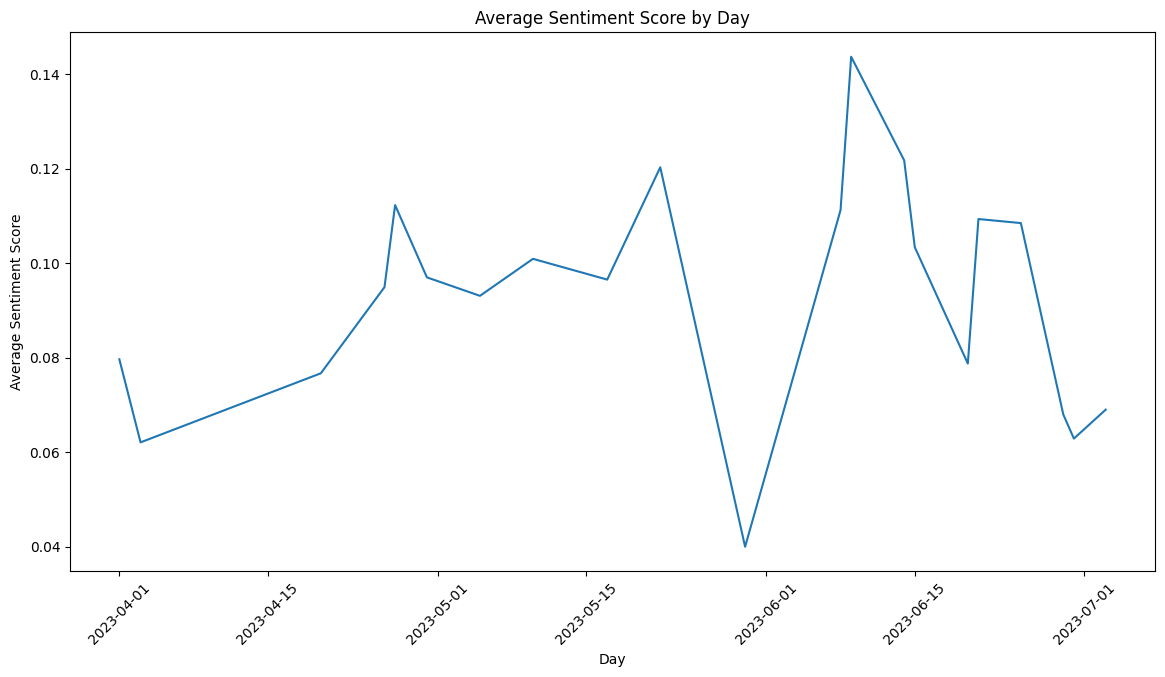

In [43]:
# Convert 'UTC Date' to datetime if it's not already
df['UTC Date'] = pd.to_datetime(df['UTC Date'])

# Group by 'UTC Date' and calculate the mean sentiment score for each day
daily_sentiment = df.groupby(df['UTC Date'].dt.date)['sentiment_score'].mean().reset_index()

plt.figure(figsize=(14, 7))
sns.lineplot(data=daily_sentiment, x='UTC Date', y='sentiment_score')
plt.title('Average Sentiment Score by Day')
plt.xlabel('Day')
plt.ylabel('Average Sentiment Score')
plt.xticks(rotation=45)
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


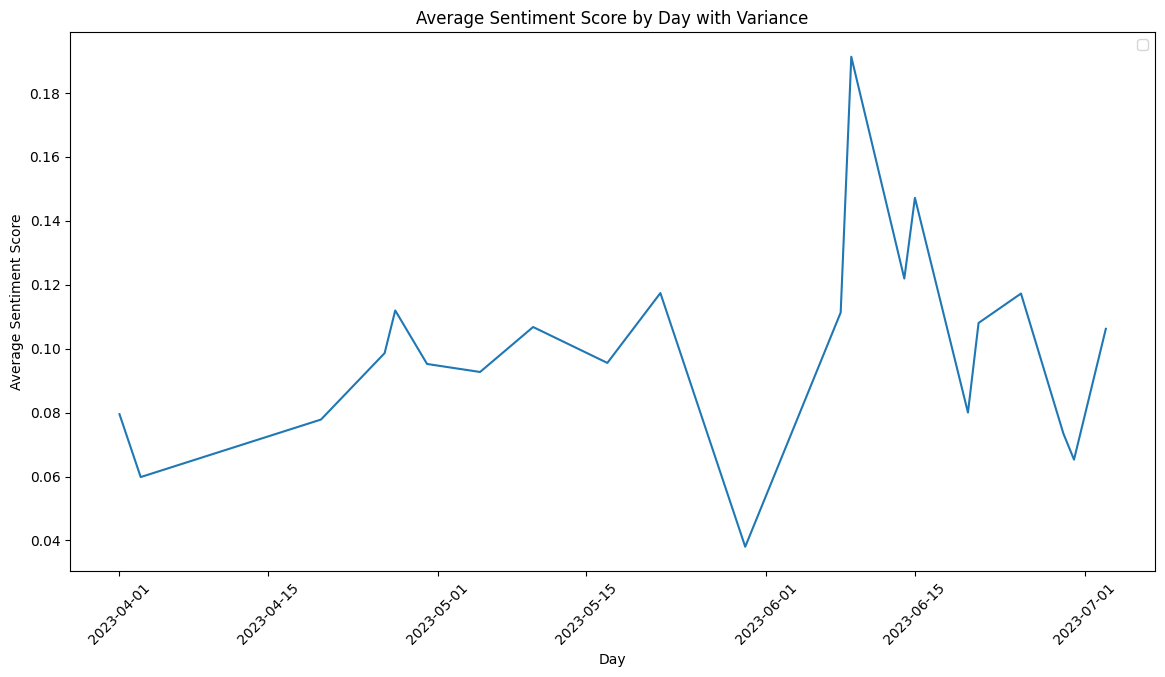

In [13]:
df['UTC Date'] = pd.to_datetime(df['UTC Date'])

daily_sentiment_mean = df.groupby(df['UTC Date'].dt.date)['Polarity'].mean().reset_index()
daily_sentiment_variance = df.groupby(df['UTC Date'].dt.date)['Polarity'].std().reset_index()

plt.figure(figsize=(14, 7))
sns.lineplot(data=daily_sentiment_mean, x='UTC Date', y='Polarity')

dates = daily_sentiment_mean['UTC Date']
daily_means = daily_sentiment_mean['Polarity']
daily_variance = daily_sentiment_variance['Polarity']
# Fill the area between mean ± variance
'''plt.fill_between(dates, 
                 daily_means - daily_variance, 
                 daily_means + daily_variance, 
                 alpha=0.2, label='Variance')'''

plt.title('Average Sentiment Score by Day with Variance')
plt.xlabel('Day')
plt.ylabel('Average Sentiment Score')
plt.xticks(rotation=45)
plt.legend()
plt.show()